# 1. 라벨 분포 시각화

/tmp/ipykernel_41424/3240576498.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x='target', palette='viridis')


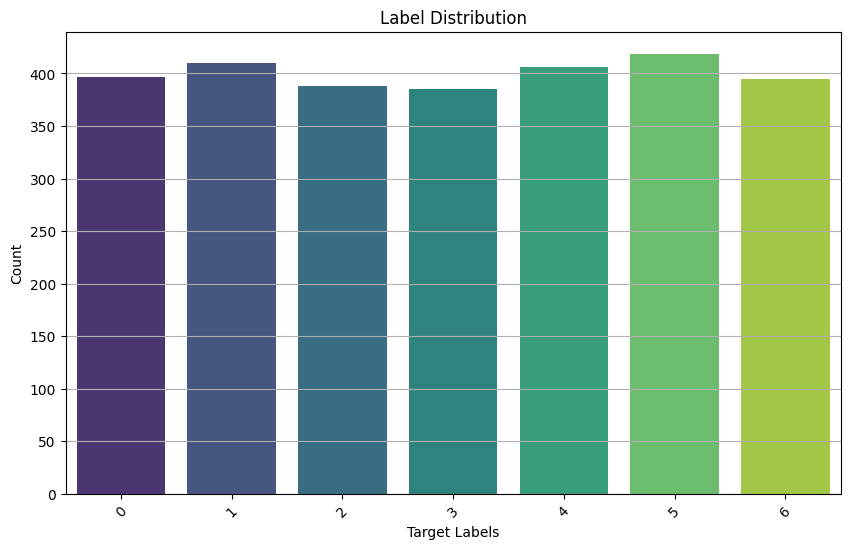

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 불러오기 (이름은 cleaned_df로 가정)
cleaned_df = pd.read_csv('/data/ephemeral/home/hsk/level2-nlp-datacentric-nlp-01/train.csv')

# 라벨 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_df, x='target', palette='viridis')
plt.title('Label Distribution')
plt.xlabel('Target Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# 2. original과 text 간의 변동 시각화 (길이)

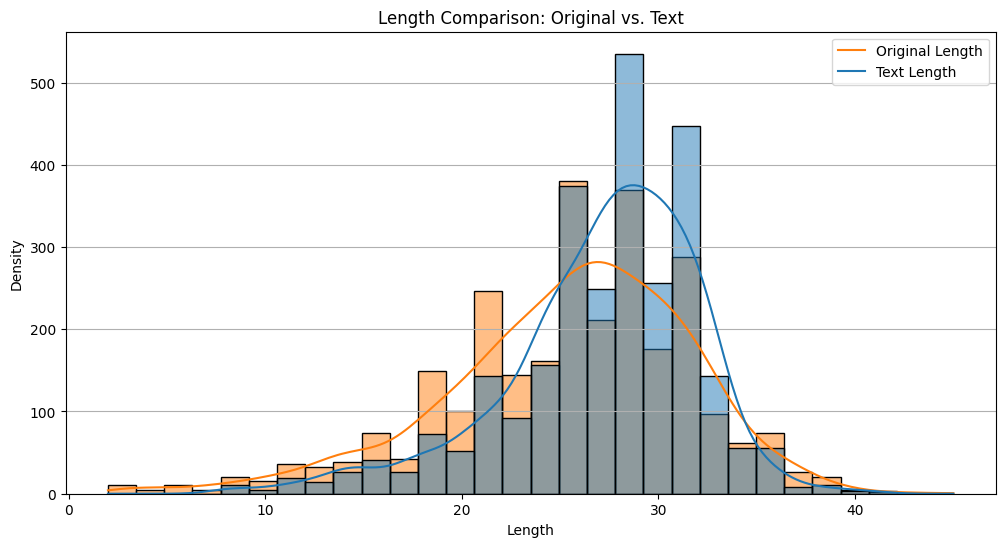

In [10]:
# 텍스트 길이 계산
cleaned_df['original_length'] = cleaned_df['original'].astype(str).apply(len)
cleaned_df['text_length'] = cleaned_df['text'].astype(str).apply(len)

# 길이 변화 시각화
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df[['original_length', 'text_length']], kde=True, bins=30)
plt.title('Length Comparison: Original vs. Text')
plt.xlabel('Length')
plt.ylabel('Density')
plt.legend(['Original Length', 'Text Length'])
plt.grid(axis='y')
plt.show()


In [11]:
import pandas as pd

# 원본 데이터프레임의 text_length 열 복사
original_text_length = cleaned_df['text_length']

# 절대값 차이 계산
cleaned_df['abs_length_diff'] = (cleaned_df['original_length'] - cleaned_df['text_length']).abs()

In [12]:
cleaned_df.head()

,ID,original,text,target,noise,original_length,text_length,abs_length_diff
0,ynat-v1_train_00000,정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보,정책: 파이 미사 이용 기간 2년 단축,4,1,32,21,11
1,ynat-v1_train_00001,K찰.국DLwo 로L3한N% 회장 2 T0&}송=,K찰.국민의힘 로비 활동 회장 2년 징역,3,1,27,22,5
2,ynat-v1_train_00002,"m 김정) 자주통일 새,?r열1나가야1보",김정은 자주통일 새 열이 나가야 한다고,2,1,22,21,1
3,ynat-v1_train_00003,갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,갤럭시노트8 주말 27만대 개통…시장은 불법 보조금 얼룩,5,0,29,31,2
4,ynat-v1_train_00004,pI美대선I앞두고 R2fr단 발] $비해 감시 강화,미대선 앞두고 러시아 단 발표 $비해 감시 강화,6,1,28,26,2


Original DataFrame size: (2800, 8)
Filtered DataFrame size: (2767, 8)
Outliers DataFrame size: (33, 8)


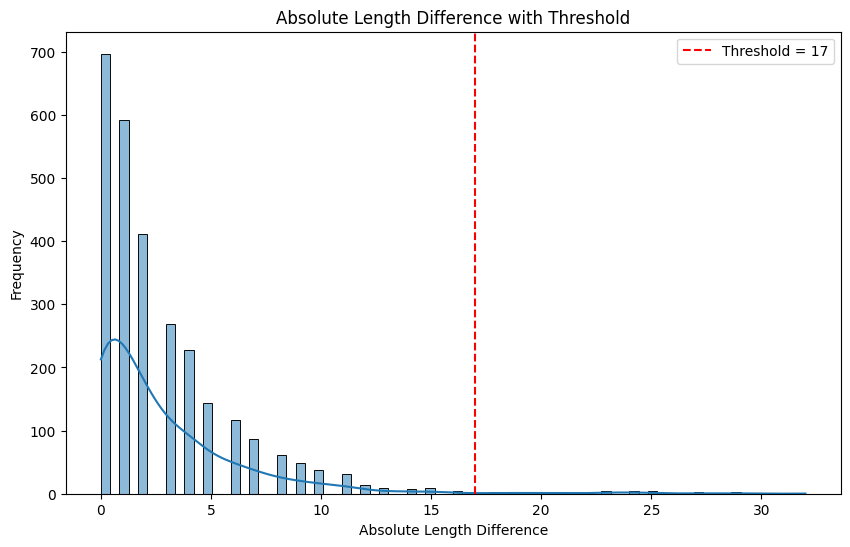

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 원본 데이터프레임 사용 (cleaned_df가 이미 존재한다고 가정)

# 절대값 차이 계산
cleaned_df['abs_length_diff'] = (cleaned_df['original_length'] - cleaned_df['text_length']).abs()

# 길이 차이가 20 이상인 경우를 이상치로 간주
threshold = 17

# 이상치 필터링
filtered_df = cleaned_df[cleaned_df['abs_length_diff'] < threshold]

# 이상치 데이터 추출
outliers_df = cleaned_df[cleaned_df['abs_length_diff'] >= threshold]

# 이상치 데이터를 CSV 파일로 저장
outliers_df.to_csv("outliers.csv", index=False)

# filtered 도 저장
filtered_df.to_csv("filtered_data.csv", index = False)

# 결과 출력
print(f"Original DataFrame size: {cleaned_df.shape}")
print(f"Filtered DataFrame size: {filtered_df.shape}")
print(f"Outliers DataFrame size: {outliers_df.shape}")

# 데이터 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='abs_length_diff', kde=True)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Absolute Length Difference with Threshold')
plt.xlabel('Absolute Length Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# 3. 이상치 탐지 및 필터링

In [26]:
import pandas as pd

# IQR을 사용한 이상치 탐지
Q1 = cleaned_df['text_length'].quantile(0.25)
Q3 = cleaned_df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
filtered_df = cleaned_df[(cleaned_df['text_length'] >= lower_bound) & (cleaned_df['text_length'] <= upper_bound)]

# 이상치 데이터 추출
outliers_df = cleaned_df[(cleaned_df['text_length'] < lower_bound) | (cleaned_df['text_length'] > upper_bound)]

# 이상치 데이터를 CSV 파일로 저장
outliers_df.to_csv("outliers.csv", index=False)

print(f"Original DataFrame size: {cleaned_df.shape}")
print(f"Filtered DataFrame size: {filtered_df.shape}")
print(f"Outliers DataFrame size: {outliers_df.shape}")


Original DataFrame size: (2800, 7)
Filtered DataFrame size: (2748, 7)
Outliers DataFrame size: (52, 7)


In [20]:
filtered_df.target.value_counts()

target
5    417
1    407
4    402
6    389
3    379
0    379
2    375
Name: count, dtype: int64

In [21]:
filtered_df.to_csv('filtered_data.csv', index=False)